## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [11]:
#Loading the data set
df_frd = pd.read_csv('creditcard.csv')
df_frd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
#observe the different feature type present in the data
df_frd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Here we will observe the distribution of our classes

In [13]:
classes=df_frd['Class'].value_counts()
normal_share=classes[0]/df_frd['Class'].count()*100
fraud_share=classes[1]/df_frd['Class'].count()*100
print(classes)
print('normal_share=',normal_share,'fraud_share=',fraud_share)

0    284315
1       492
Name: Class, dtype: int64
normal_share= 99.82725143693798 fraud_share= 0.1727485630620034


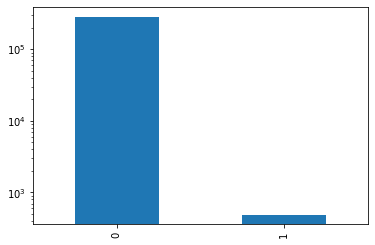

In [14]:
df_frd['Class'].value_counts().plot(kind='bar')
plt.yscale('log')

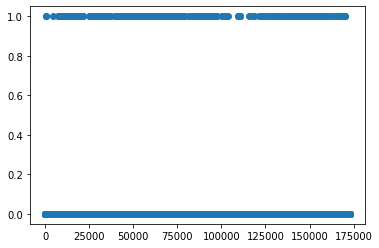

In [15]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(x=df_frd['Time'],y=df_frd['Class'])

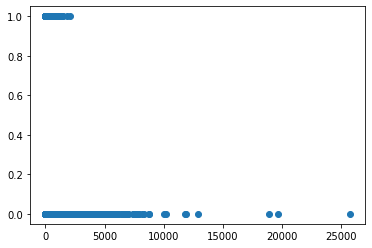

In [16]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(x=df_frd['Amount'],y=df_frd['Class'])

In [17]:
# Drop unnecessary columns

### Splitting the data into train & test data

In [18]:
y= df_frd['Class'] #class variable
x_var=[k for k in df_frd.columns if k!='Class']

In [19]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_frd[x_var], df_frd['Class'],
                                                    stratify=df_frd['Class'],test_size=0.3,
                                                    random_state=48)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [20]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

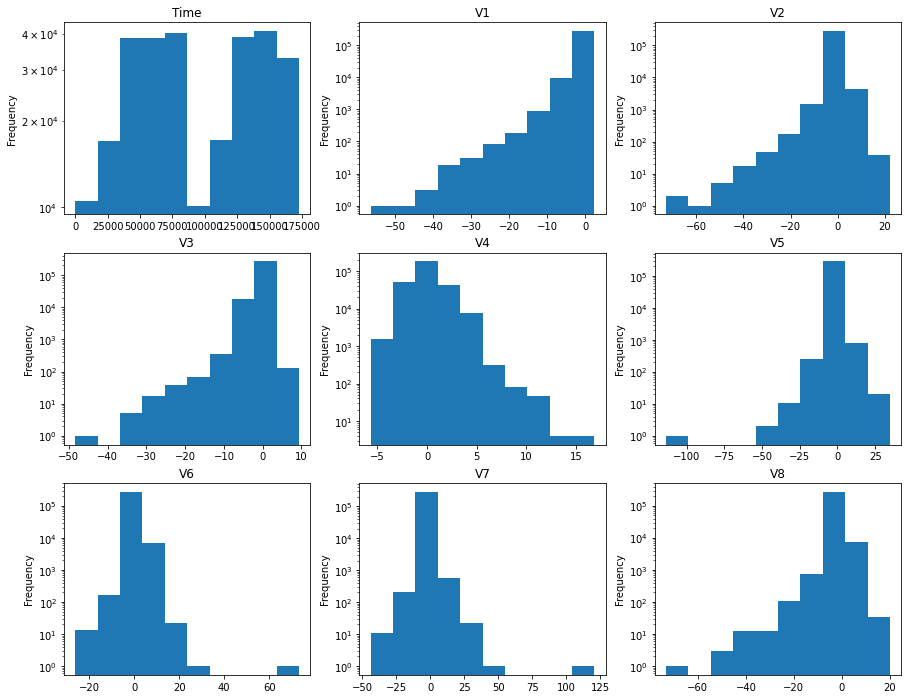

In [21]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(15,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    df_frd[df_frd.columns[i]].plot(kind='hist')
    plt.title(df_frd.columns[i])
    plt.yscale('log')
plt.show()


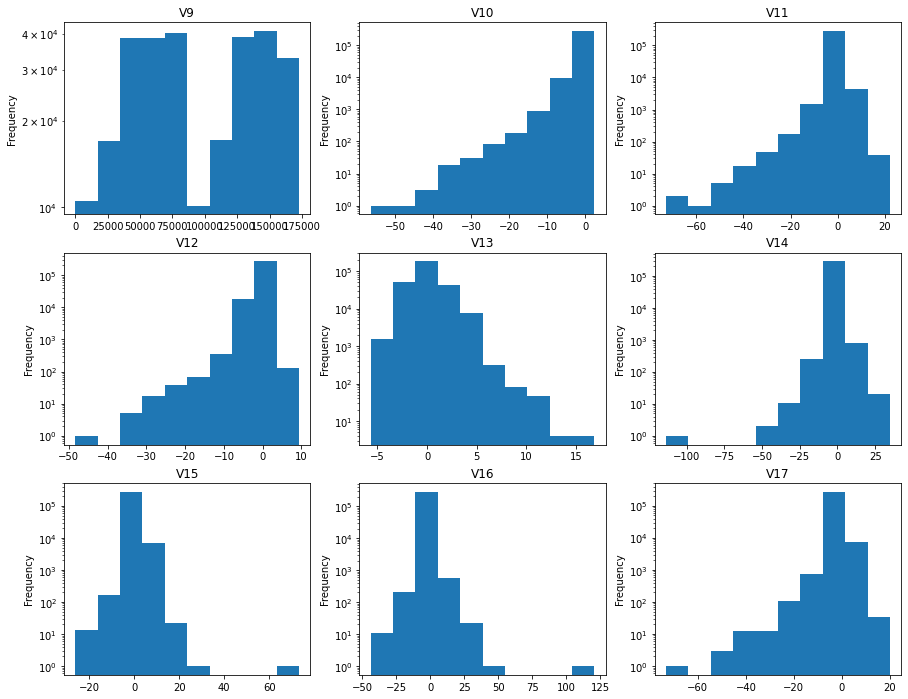

In [22]:
plt.figure(figsize=(15,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    df_frd[df_frd.columns[i]].plot(kind='hist')
    plt.title(df_frd.columns[i+9])
    plt.yscale('log')
plt.show()


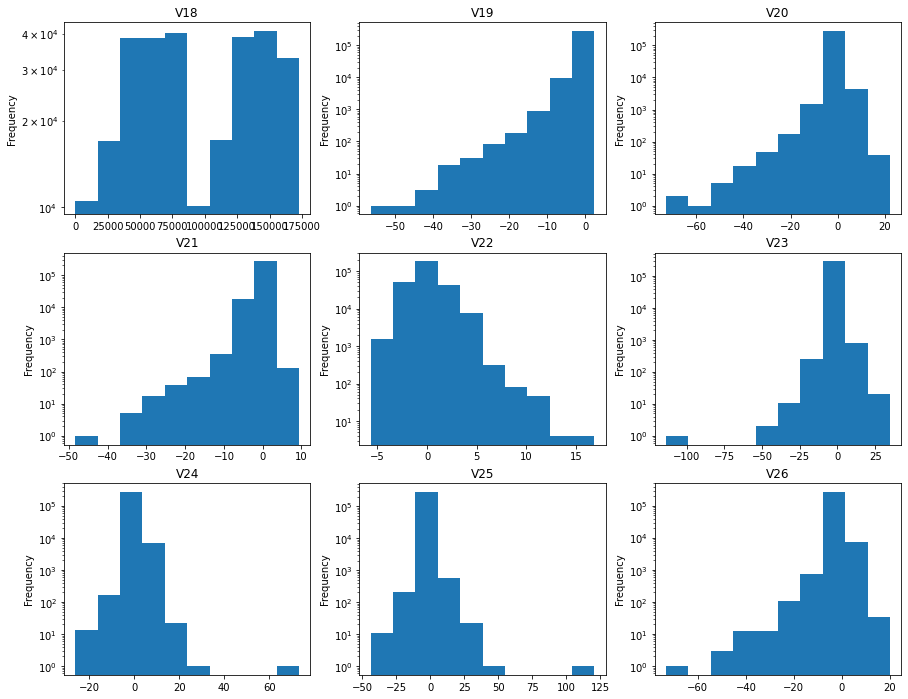

In [23]:
plt.figure(figsize=(15,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    df_frd[df_frd.columns[i]].plot(kind='hist')
    plt.title(df_frd.columns[i+18])
    plt.yscale('log')
plt.show()

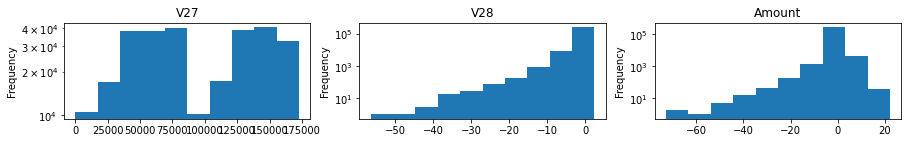

In [24]:
plt.figure(figsize=(15,6))
for i in range(3):
    plt.subplot(3,3,i+1)
    df_frd[df_frd.columns[i]].plot(kind='hist')
    plt.title(df_frd.columns[i+27])
    plt.yscale('log')
plt.show()

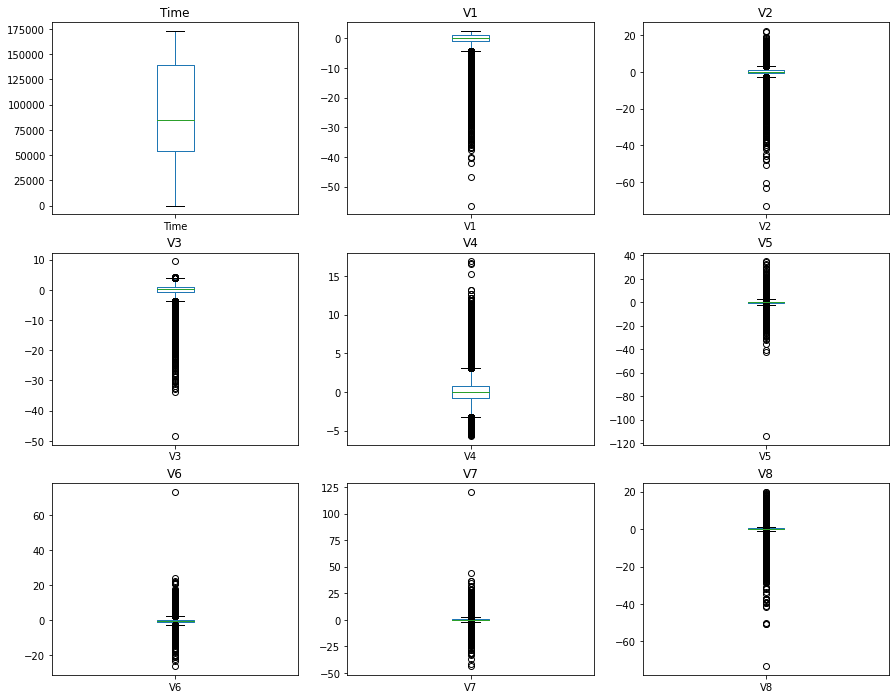

In [25]:
plt.figure(figsize=(15,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    df_frd[df_frd.columns[i]].plot(kind='box')
    plt.title(df_frd.columns[i])
plt.show()

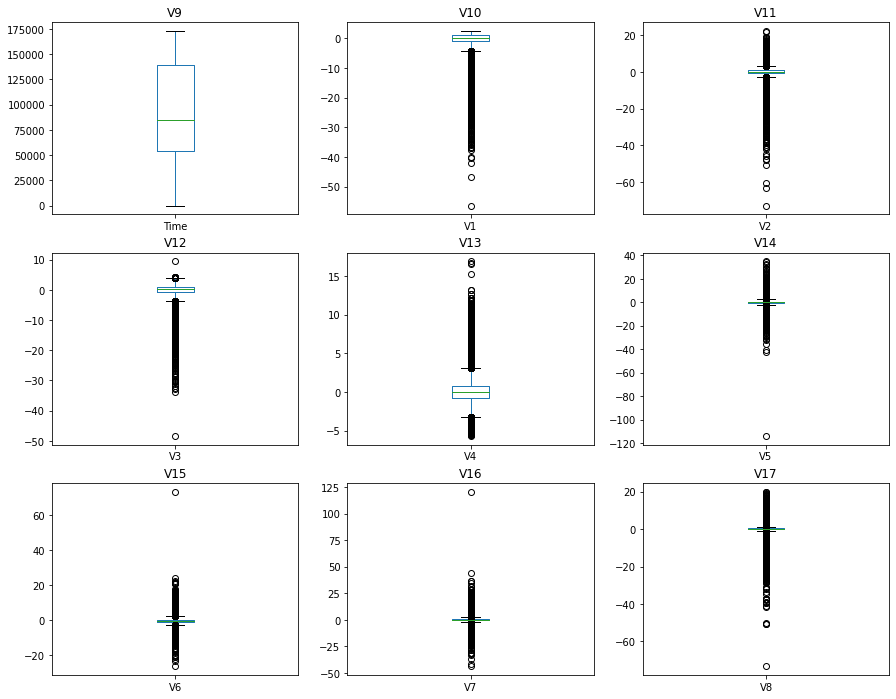

In [26]:
plt.figure(figsize=(15,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    df_frd[df_frd.columns[i]].plot(kind='box')
    plt.title(df_frd.columns[i+9])
plt.show()

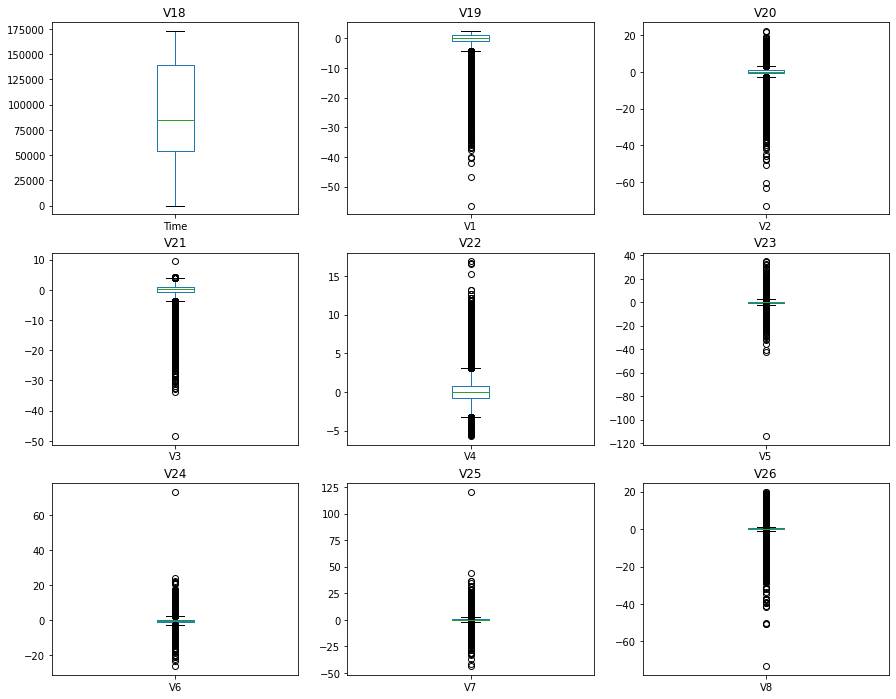

In [27]:
plt.figure(figsize=(15,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    df_frd[df_frd.columns[i]].plot(kind='box')
    plt.title(df_frd.columns[i+18])
plt.show()

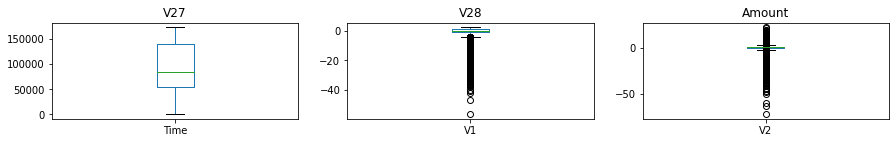

In [28]:
plt.figure(figsize=(15,6))
for i in range(3):
    plt.subplot(3,3,i+1)
    df_frd[df_frd.columns[i]].plot(kind='box')
    plt.title(df_frd.columns[i+27])
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [29]:
from sklearn.preprocessing import PowerTransformer
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
trans_cols=['Time','V1','V2','V3','V4','V11','V12','V14','V17','Amount']
pt = PowerTransformer()
pt.fit(X_train[trans_cols])
X_train[trans_cols]=pt.transform(X_train[trans_cols])
X_test[trans_cols]=pt.transform(X_test[trans_cols])

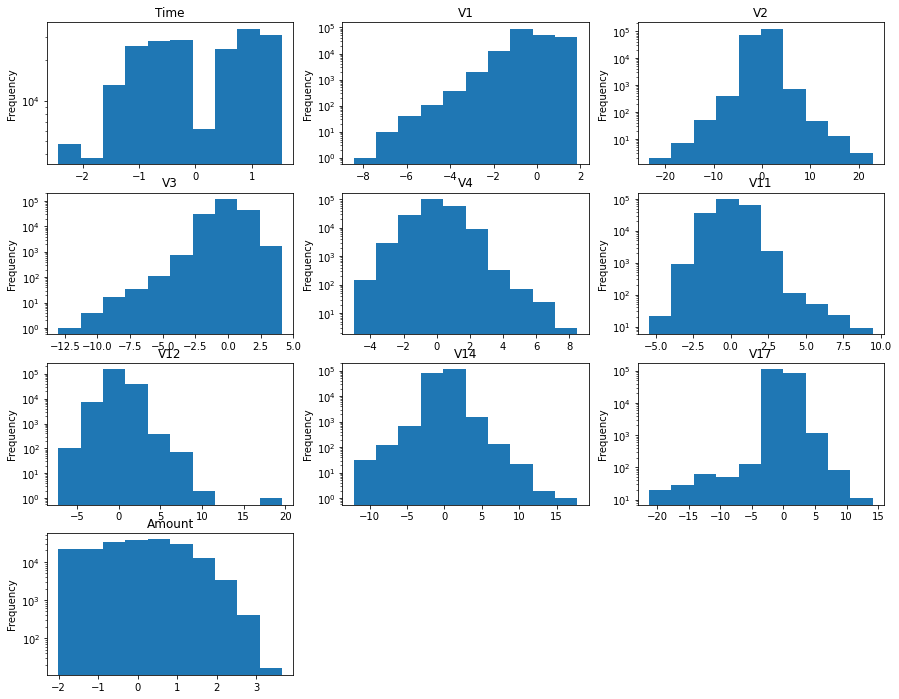

In [30]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(15,12))
for i in range(len(trans_cols)):
    plt.subplot(4,3,i+1)
    X_train[trans_cols[i]].plot(kind='hist')
    plt.title(trans_cols[i])
    plt.yscale('log')
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [22]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [37]:
# Create the parameter grid based on the results of random search 

lr = LogisticRegression()
#perform hyperparameter tuning
params = { 'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 3 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 48)

#Hyper parameter tuning using Logistic regression
# create gridsearch object
model = GridSearchCV(estimator=lr, cv=folds, param_grid=params, scoring='roc_auc')
model.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('best_score=',model.best_score_)
#print the optimum value of hyperparameters
print('best_params=',model.best_params_)

best_score= 0.9814428305260139
best_params= {'C': 0.1, 'penalty': 'l2'}


In [38]:
# Fitting the model
logreg = LogisticRegression(C=0.1,penalty='l2')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
print('auc_roc=',roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1]))

auc_roc= 0.9727448299463071


lets look at some other model and evaluate the auc_roc curve

### RandomForest Model

In [35]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [47]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(9,16,2)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',return_train_score=True,n_jobs=4)
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [48]:
# scores of GridSearch CV
scores = rf.cv_results_
sc=pd.DataFrame(scores)
sc.head()

sc[sc['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
3,170.262936,5.411104,0.827581,0.108955,15,{'max_depth': 15},0.97428,0.980988,0.980523,0.978597,0.003059,1,0.999999,0.999998,0.999998,0.999998,3.781317e-07


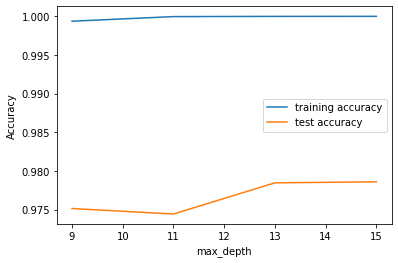

In [49]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [53]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [9,15],
    'min_samples_leaf': [7,4],
    'min_samples_split': [4,7]
}
# Create a based mo
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring="roc_auc",
                          cv = 3, n_jobs = 4,verbose = 1)

In [54]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed: 14.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [55]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9792305194001331 using {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 7}


In [85]:
#Building the model with tuned parameters
rfc = RandomForestClassifier(
                             max_depth=15,
                             min_samples_leaf=4, 
                             min_samples_split=7,
                           )
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
print('auc_roc=',roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1]))

auc_roc= 0.9747724114876352


Since this model has better auc_roc score, lets try to find the optimal cutoff for probability score that results in max of sensitivity since we have very number of records for class=1.

In [87]:
#predicting the class for train data set
y_train_pred_rf=rfc.predict(X_train)
y_train_prob_rf=rfc.predict_proba(X_train)[:,1]

In [9]:
#Function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

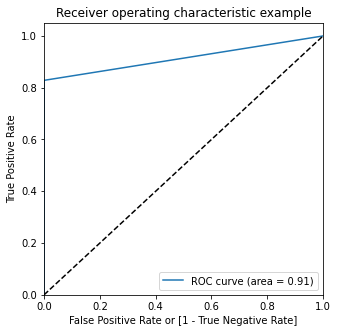

In [88]:
# Roc curve which is desirable and occupying maximum area possible
draw_roc(y_train, y_train_pred_rf)

In [89]:
#predicting the class for different cuttoff 
rf_df=pd.DataFrame()
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    rf_df[i]=list(map(lambda x: 1 if x> i else 0,y_train_prob_rf))
rf_df.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [90]:
#For different cut offs calculating the metrics
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, rf_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001725  1.000000  0.000000
0.1   0.1  0.999448  0.938953  0.999553
0.2   0.2  0.999544  0.863372  0.999779
0.3   0.3  0.999629  0.848837  0.999889
0.4   0.4  0.999679  0.845930  0.999945
0.5   0.5  0.999669  0.828488  0.999965
0.6   0.6  0.999624  0.799419  0.999970
0.7   0.7  0.999579  0.755814  1.000000
0.8   0.8  0.999433  0.671512  1.000000
0.9   0.9  0.999137  0.500000  1.000000


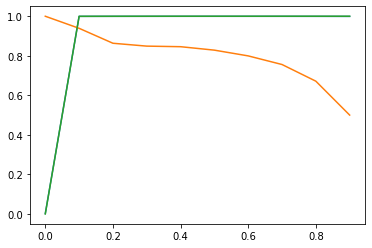

In [91]:
#Plotting the metrics accuracy,sensitivity,specificity as the intersection is around 0.3 
#so we take cutoff as 0.4 for now
plt.plot(cutoff_df['accuracy'])
plt.plot(cutoff_df['sensi'])
plt.plot(cutoff_df['speci'])
plt.show()

In [92]:
y_test_prob_rf=rfc.predict_proba(X_test)[:,1]

In [94]:
y_test_pred_rf=pd.Series(map(lambda x:1 if x>0.1 else 0,y_test_prob_rf))

In [95]:
#Accuracy for the test set
round(metrics.accuracy_score(y_test, y_test_pred_rf)*100,2)

99.94

In [96]:
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
# create onfusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred_rf, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

print("AUC:    \t", round(roc_auc_score(y_test, y_test_prob_rf),2))

[[85269    26]
 [   25   123]]
Sensitivity: 	0.83
Specificity: 	1.0
AUC:    	 0.97


#### As we can see here the sesitivity relatively low and false negative is high for class=1 minority data set, so we shall performe oversampling techniques to treat class imbalance in the data set.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [0]:
var_imp = []
for i in rfc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [36]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [0]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
oversample = RandomOverSampler(sampling_strategy=0.5,random_state=48)
X_ran,y_ran=oversample.fit_resample(X_train,y_train)


In [166]:
df_resam=pd.DataFrame(X_ran,columns=x_var)
df_resam.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.803780,-0.974531,-2.519685,-0.092178,1.843056,-2.541003,1.177054,0.815671,-0.013970,1.567896,-1.023891,-1.855599,0.644499,-0.055918,-0.833637,-1.401238,-0.245292,0.261389,0.159797,-0.107253,2.636207,0.719642,-0.556416,-1.343423,0.143539,0.091303,-0.366592,-0.154589,0.274232,2.286174
1,-0.568892,0.577608,-1.368744,-0.247525,-1.604814,-0.121064,4.281005,-2.316777,1.107012,-0.814674,1.185907,-0.775355,-0.905914,0.562820,-1.151456,-0.022466,-0.006705,0.183297,0.928594,0.060972,0.159819,0.050532,0.248024,-0.234717,1.039939,0.401875,0.019847,0.074852,0.061433,1.248229
2,-1.157676,-1.387629,-3.323788,-0.726240,1.821903,-2.046707,3.456960,1.285310,0.558278,1.210200,-1.302176,0.814515,1.633078,-1.190853,-0.012723,-0.986013,-1.424923,1.769776,-1.419462,-1.291963,3.483521,0.993582,-0.898069,-1.587151,-1.257629,-0.504680,-0.490517,-0.207149,0.332869,2.442618
3,-0.933471,-0.350386,-0.091669,1.165344,-0.474730,0.019998,-0.018094,0.225923,-0.239960,-1.331195,0.488468,-0.343506,-0.577882,1.086931,-0.807186,0.442659,-0.077379,1.115903,-1.856164,1.723957,0.436940,0.103570,0.520776,-0.140201,-0.220681,-0.189450,-0.146411,-0.011902,-0.094254,0.165738
4,-1.218083,0.534646,-0.148222,1.006407,0.980265,-0.987740,0.075023,-0.656055,0.230403,0.923224,-0.235464,-0.294805,0.405677,-0.424732,-0.329610,0.448392,-0.291543,0.169980,-0.570809,-0.690190,-0.199482,-0.017387,0.169467,0.069608,0.400284,0.285550,-0.398529,0.086772,0.037520,-0.426953


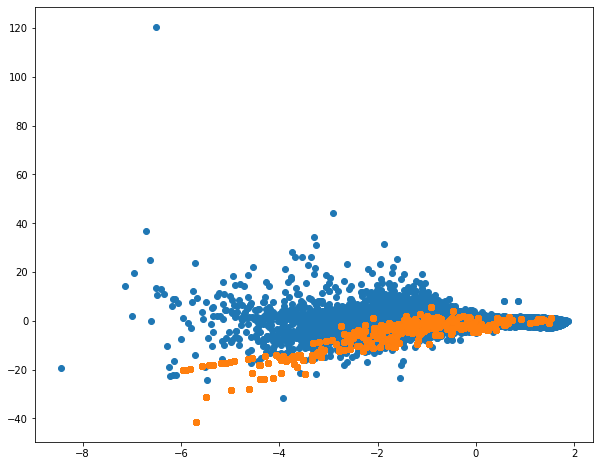

In [167]:
df_c1=df_resam[y_ran==0][['V1','V7']]
df_c2=df_resam[y_ran==1][['V1','V7']]
plt.figure(figsize=(10,8))
plt.scatter(x=df_c1['V1'],y=df_c1['V7'])
plt.scatter(x=df_c2['V1'],y=df_c2['V7'])
plt.show()

In [170]:
#perform hyperparameter tuning
params = { 'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 3 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 48)

#Hyper parameter tuning using Logistic regression
# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc')
model.fit(X_ran,y_ran)
#print the evaluation result by choosing a evaluation metric
print('best_score=',model.best_score_)
#print the optimum value of hyperparameters
print('best_params=',model.best_params_)

best_score= 0.9874366142162115
best_params= {'C': 0.1, 'penalty': 'l2'}


In [170]:
#perform hyperparameter tuning
params = { 'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 3 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 48)

#Hyper parameter tuning using Logistic regression
# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc')
model.fit(X_ran,y_ran)
#print the evaluation result by choosing a evaluation metric
print('best_score=',model.best_score_)
#print the optimum value of hyperparameters
print('best_params=',model.best_params_)

best_score= 0.9874366142162115
best_params= {'C': 0.1, 'penalty': 'l2'}


In [16]:
#AUC_ROC score for test data set
logistic = LogisticRegression(C=0.1,penalty='l2')
logistic.fit(X_ran,y_ran)
print('auc_roc=',roc_auc_score(y_test,logistic.predict_proba(X_test)[:,1]))


auc_roc= 0.9774093250293496


Random Forest


In [178]:
from sklearn.ensemble import RandomForestClassifier

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth':[3,5,7,9]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state=48)


# fit tree on training data
rf1 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",verbose=1,return_train_score=True,
                   n_jobs=4)
rf1.fit(X_ran,y_ran)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  8.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=48,
                                  

In [179]:
# scores of GridSearch CV
scores = rf1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,91.160298,0.550162,1.594457,0.025655,3,{'max_depth': 3},0.983989,0.983412,0.982774,0.983392,0.000497,4,0.983699,0.982911,0.983748,0.983453,0.000384
1,143.183755,0.529946,1.728450,0.011095,5,{'max_depth': 5},0.994701,0.995158,0.994247,0.994702,0.000372,3,0.994595,0.995046,0.994628,0.994756,0.000205
2,194.860165,3.434847,1.974304,0.040974,7,{'max_depth': 7},0.999152,0.999153,0.999155,0.999153,0.000002,2,0.999212,0.999174,0.999249,0.999212,0.000030
3,205.780448,23.668669,1.096864,0.286123,9,{'max_depth': 9},0.999857,0.999924,0.999905,0.999895,0.000028,1,0.999913,0.999944,0.999921,0.999926,0.000013


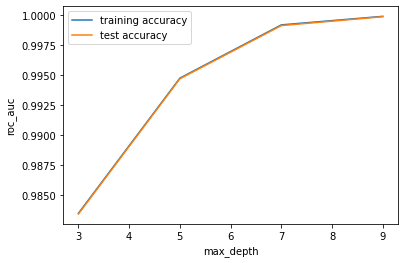

In [180]:
# plotting roc_auc with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [182]:
from sklearn.ensemble import RandomForestClassifier

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 14, 20, 24],'max_depth':[5]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state=48)


# fit tree on training data
rf1 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",verbose=1,return_train_score=True,n_jobs=4)
rf1.fit(X_ran,y_ran)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 22.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=48,
                                  

In [0]:
# scores of GridSearch CV
scores = rf1.cv_results_
pd.DataFrame(scores).head()

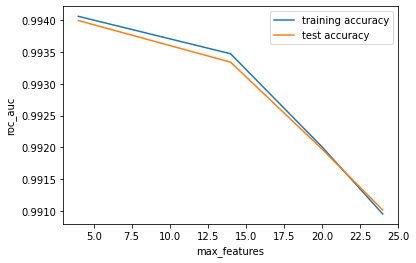

In [185]:
# plotting roc_auc with max_depth
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [190]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 100),'max_depth':[5]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state=48)


# fit tree on training data
rf1 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",verbose=1,return_train_score=True,n_jobs=4)
rf1.fit(X_ran,y_ran)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  8.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=48,
                                  

In [188]:
# scores of GridSearch CV
scores = rf1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,156.306521,0.427915,1.863423,0.056919,5,100,"{'max_depth': 5, 'min_samples_leaf': 100}",0.994455,0.994949,0.993317,0.994240,0.000683,1,0.994353,0.994791,0.993826,0.994324,0.000395
1,152.553970,2.722745,1.843594,0.038893,5,200,"{'max_depth': 5, 'min_samples_leaf': 200}",0.993935,0.994404,0.993363,0.993900,0.000426,3,0.993800,0.994282,0.993922,0.994001,0.000205
2,115.446832,47.468319,1.408923,0.579112,5,300,"{'max_depth': 5, 'min_samples_leaf': 300}",0.994475,0.994271,0.993302,0.994016,0.000511,2,0.994394,0.994170,0.993787,0.994117,0.000251


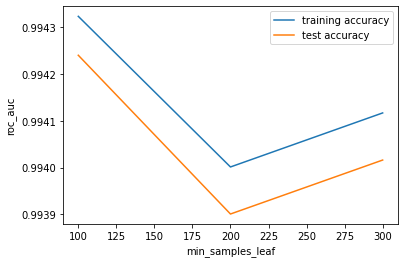

In [189]:
# plotting roc_auc with max_depth
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [200]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 160, 30),'max_depth':[5],'max_features':[17,19,22]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state=48)


# fit tree on training data
rf1 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",verbose=1,return_train_score=True,n_jobs=4)
rf1.fit(X_ran,y_ran)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 40.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=48,
                                  

In [202]:
rf1.best_params_

{'max_depth': 5, 'max_features': 17, 'min_samples_leaf': 100}

In [19]:
#ROC_AUC score for test data set
rf = RandomForestClassifier(random_state=48,max_depth=5,max_features=17,min_samples_leaf=100)
rf.fit(X_ran,y_ran)
roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])


0.9706988702167201

In [23]:
#ROC_AUC score for train data set
roc_auc_score(y_ran,rf.predict_proba(X_ran)[:,1])

0.9928062649935139

### Similarly explore other algorithms on balanced dataset by building models:

### Print the class distribution after applying SMOTE 

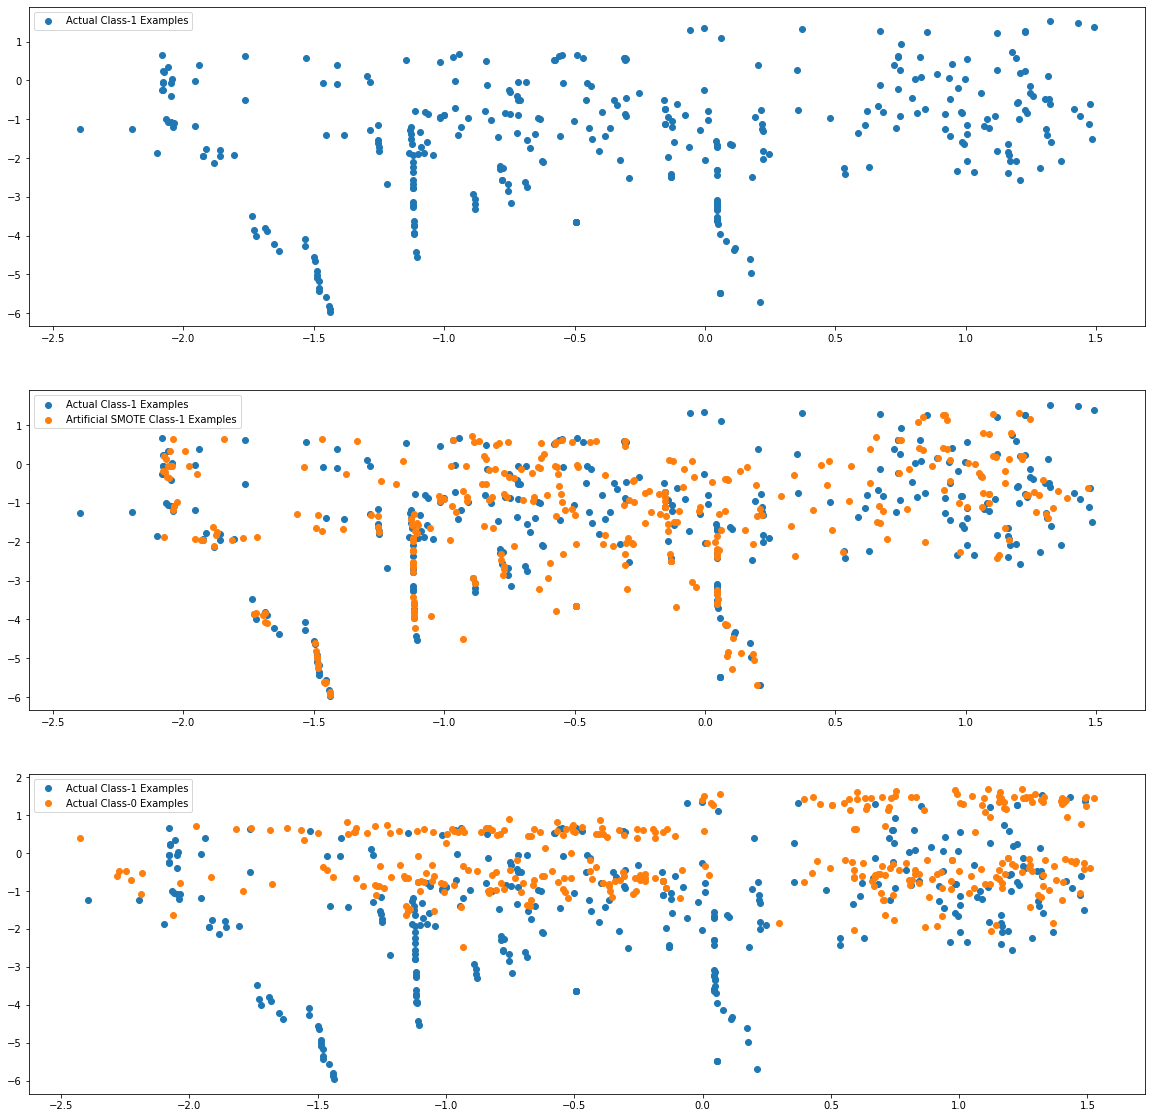

In [205]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [207]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
#perform hyperparameter tuning
params = { 'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 3 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 48)

#Hyper parameter tuning using Logistic regression
# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc')
model.fit(X_train_smote,y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('best_score=',model.best_score_)
#print the optimum value of hyperparameters
print('best_params=',model.best_params_)


best_score= 0.9906291807143719
best_params= {'C': 0.1, 'penalty': 'l2'}


In [209]:
logistic=LogisticRegression(random_state=48,C=0.1,penalty='l2')
logistic.fit(X_train_smote,y_train_smote)
roc_auc_score(y_test,logistic.predict(X_test))

0.9434425911344254

In [210]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 160, 30),'max_depth':[5],'max_features':[17,19,22]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state=48)


# fit tree on training data
rf1 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",verbose=1,return_train_score=True,n_jobs=4)
rf1.fit(X_train_smote,y_train_smote)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 70.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=48,
                                  

In [211]:
rf1.best_params_

{'max_depth': 5, 'max_features': 17, 'min_samples_leaf': 130}

In [27]:
#ROC_AUC score test data Set
rf = RandomForestClassifier(random_state=48,max_depth=5,max_features=17,min_samples_leaf=130)
rf.fit(X_train_smote,y_train_smote)
roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])


0.9757502182409856

In [28]:
#ROC_AUC score train data Set
roc_auc_score(y_train_smote,rf.predict_proba(X_train_smote)[:,1])

0.9955949937908494

##### Build models on other algorithms to see the better performing on SMOTE. 
#### Next we will be using ADASYN

In [32]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [59]:
#Creating ADASYS model
oversample = ADASYN(random_state=100)

In [60]:
# We shall 1st look at the logistic regression
logistic = LogisticRegression()

In [61]:
# create pipeline
steps = [("oversample", oversample),
         ("logistic", logistic)
        ]

# compile pipeline
over_logistic = Pipeline(steps)

In [62]:
# hyperparameter space
params = { 'oversample__n_neighbors':[1,3,5],
          'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 3 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=over_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [63]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('oversample',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=100,
                                               sampling_strategy='auto')),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
        

In [64]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9710761729423067
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'oversample__n_neighbors': 5}


In [33]:
#Creating balanced data set using tuned parameters for ADASYN
ada = ADASYN(random_state=100,n_neighbors=5) 
X_ada,y_ada = ada.fit_resample(X_train,y_train)

In [ ]:
#Lets look at the distribution of class after apply ADASYN

X_train_adasyn, y_train_adasyn = X_ada,y_ada
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [66]:
print(y_train.value_counts())
print(y_ada.value_counts())

0    199020
1       344
Name: Class, dtype: int64
1    199059
0    199020
Name: Class, dtype: int64


In [67]:
# Fitting the model
logreg_os = LogisticRegression(C=0.1,penalty='l2')
logreg_os.fit(X_ada, y_ada)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
#ROC_AUC score test data Set
roc_auc_score(y_test,logreg_os.predict_proba(X_test)[:,1])

0.9767866846857409

### looking for a better Model: Building Model Random Forest 

In [75]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(9,16,2)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',return_train_score=True,n_jobs=4)
rf.fit(X_ada, y_ada)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [76]:
# scores of GridSearch CV
scores = rf.cv_results_
sc=pd.DataFrame(scores)
sc.head()

sc[sc['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
3,268.197401,4.300794,1.696444,0.093352,15,{'max_depth': 15},0.994157,0.993386,0.995271,0.994271,0.000774,1,1.0,0.999995,1.0,0.999998,0.000002


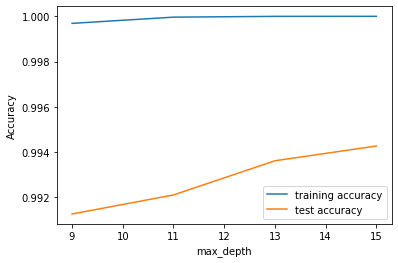

In [78]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15],
    'min_samples_leaf': [7,4],
    'min_samples_split': [4,7]
}
# Create a based mo
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [80]:
# Fit the grid search to the data
grid_search.fit(X_ada, y_ada)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 14.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [81]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9168356029833274 using {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 4}


In [36]:
rfc_ada = RandomForestClassifier(
                             max_depth=15,
                             min_samples_leaf=2, 
                             min_samples_split=4
                           )
rfc_ada.fit(X_ada, y_ada)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
#ROC_AUC score test data Set
roc_auc_score(y_test,rfc_ada.predict_proba(X_test)[:,1])

0.9752201817856311

In [38]:
#predicting class for training set
y_train_ada_pred_rf=rfc_ada.predict(X_ada)
y_train_ada_prob_rf=rfc_ada.predict_proba(X_ada)[:,1]

In [39]:
print(len(y_train))

199364


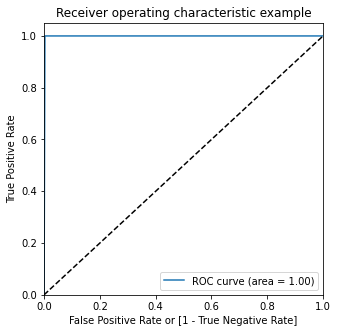

In [40]:
# Roc curve which is desirable and occupying maximum area possible
draw_roc(y_ada, y_train_ada_pred_rf)

As we can the ROC curve is better in this model compared to all other model, we shall proceed further in evaluating the this model as final model

In [41]:
# Creting class for different cutoffs from probabilty score predicted
rf_ada_df=pd.DataFrame()
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    rf_ada_df[i]=list(map(lambda x: 1 if x> i else 0,y_train_ada_prob_rf))
rf_ada_df.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [42]:
#For different cut offs calculating the metrics
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_ada, rf_ada_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.574893  1.000000  0.149704
0.1   0.1  0.981177  1.000000  0.962351
0.2   0.2  0.990467  1.000000  0.980932
0.3   0.3  0.994652  1.000000  0.989303
0.4   0.4  0.997068  1.000000  0.994136
0.5   0.5  0.998530  1.000000  0.997061
0.6   0.6  0.999254  0.999995  0.998513
0.7   0.7  0.999636  0.999995  0.999276
0.8   0.8  0.999844  0.999985  0.999704
0.9   0.9  0.999797  0.999689  0.999905


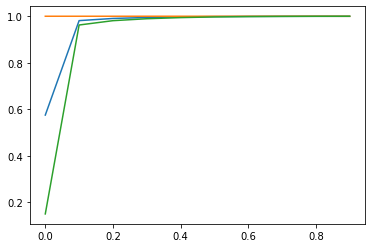

In [43]:
#Plotting the metrics accuracy,sensitivity,specificity as the intersection is around 0.3 
#so we take cutoff as 0.4 for now
plt.plot(cutoff_df['accuracy'])
plt.plot(cutoff_df['sensi'])
plt.plot(cutoff_df['speci'])
plt.show()

In [44]:
#Predicting probability score for test data set
y_test_ada_prob_rf=rfc_ada.predict_proba(X_test)[:,1]

Looking at the graph and confusion we choose cutoff as 0.1 as it gives maximum output for all the three matrix: accurancy,sensitivity and specificity

In [45]:
y_train_ada_pred_rf=pd.Series(map(lambda x:1 if x>0.1 else 0,y_train_ada_prob_rf))

In [46]:
y_test_ada_pred_rf=pd.Series(map(lambda x:1 if x>0.1 else 0,y_test_ada_prob_rf))

In [47]:
#Accuracy for the train set after updating cutoff point
round(metrics.accuracy_score(y_ada, y_train_ada_pred_rf)*100,2)

98.12

In [48]:
#Accuracy for the test set after updating cutoff point
round(metrics.accuracy_score(y_test, y_test_ada_pred_rf)*100,2)

95.98

In [49]:
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
# create onfusion matrix
cm = confusion_matrix(y_test, y_test_ada_pred_rf)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_ada_pred_rf, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

print("AUC:    \t", round(roc_auc_score(y_test, y_test_ada_prob_rf),2))

[[81869  3426]
 [   12   136]]
Sensitivity: 	0.92
Specificity: 	0.96
AUC:    	 0.98


#### As we can see from confusion matrix the False negative are less than that of model build without oversampling,So we can be sure these are best scores from final model for this data set.

### Print the important features of the best model to understand the dataset

In [0]:
var_imp = []
for i in rfc_ada.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc_ada.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc_ada.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc_ada.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(rfc_ada.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc_ada.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### COST ANALYSIS


In [50]:
#Creating a dataframe with amount,true and predicted values
X_test_ama=X_test.copy()
X_test_ama['true_class']=y_test
X_test_ama['pred_prob']=y_test_ada_prob_rf
ama=df_frd[['Amount']].merge(X_test_ama[['pred_prob','true_class']],left_index=True, right_index=True)
ama.head()

,Amount,pred_prob,true_class
1,2.69,0.000004,0
2,378.66,0.000073,0
3,123.50,0.000046,0
13,27.50,0.000046,0
18,46.80,0.015000,0


In [51]:
#predicting the target values by using different cut offs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    ama[i]=ama.pred_prob.map(lambda x: 1 if x> i else 0)
ama.head()

,Amount,pred_prob,true_class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1,2.69,0.000004,0,1,0,0,0,0,0,0,0,0,0
2,378.66,0.000073,0,1,0,0,0,0,0,0,0,0,0
3,123.50,0.000046,0,1,0,0,0,0,0,0,0,0,0
13,27.50,0.000046,0,1,0,0,0,0,0,0,0,0,0
18,46.80,0.015000,0,1,0,0,0,0,0,0,0,0,0


In [52]:
#For different cut offs calculating the metrics
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(ama['true_class'], ama[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.144084  0.993243  0.142611
0.1   0.1  0.959763  0.918919  0.959834
0.2   0.2  0.980232  0.864865  0.980433
0.3   0.3  0.988846  0.851351  0.989085
0.4   0.4  0.993739  0.837838  0.994009
0.5   0.5  0.996770  0.824324  0.997069
0.6   0.6  0.998268  0.804054  0.998605
0.7   0.7  0.998982  0.797297  0.999332
0.8   0.8  0.999298  0.736486  0.999754
0.9   0.9  0.999251  0.621622  0.999906


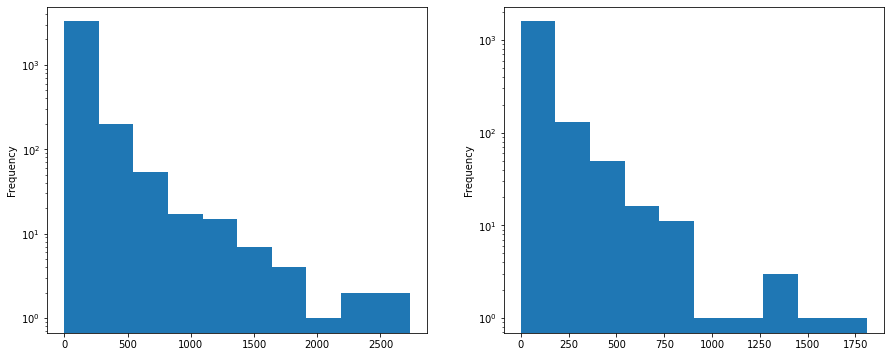

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ama[ama[0.1]==1]['Amount'].plot(kind='hist')
plt.yscale('log')
plt.subplot(1,2,2)
ama[ama[0.2]==1]['Amount'].plot(kind='hist')
plt.yscale('log')
plt.show()

choosing between 0.1 and 0.2 as cutoff considering the cost to company for stopping the fraud vs the actual loss amount due to fraud

In [57]:
amt_1=ama[ama[0.1]==1]['Amount'].sum()
amt_2=ama[ama[0.2]==1]['Amount'].sum()
print('Amount loss due to Fraud for cutoff 0.1 =',amt_1)
print('Amount loss due to Fraud for cutoff 0.2 =',amt_2)

Amount loss due to Fraud for cutoff 0.1 = 312489.27
Amount loss due to Fraud for cutoff 0.2 = 133363.61


suppose the cost to company to stop the fraud 100 units then the following the cost to company for two separate cuttoffs

In [58]:
cost_1=ama[ama[0.1]==1]['Amount'].count()
cost_2=ama[ama[0.2]==1]['Amount'].count()
print('Cost to company to stop Fraud for cutoff 0.1 =',cost_1*100)
print('Cost to company to stop Fraud for cutoff 0.2 =',cost_2*100)

Cost to company to stop Fraud for cutoff 0.1 = 356200
Cost to company to stop Fraud for cutoff 0.2 = 179700


In [59]:
print('cost to company saving for cutoff 0.2 instead of 0.1 =',cost_1-cost_2)
print('Amount that will be lost for letting go the fraud for selecting cutoff 0.2 over 0.1 =',amt_1-amt_2)

cost to company saving for cutoff 0.2 instead of 0.1 = 1765
Amount that will be lost for letting go the fraud for selecting cutoff 0.2 over 0.1 = 179125.66000000003
